# Homework 5

Due by 11:00pm on February 23, 2023

For submission instructions, see:
http://faculty.washington.edu/rjl/classes/am574w2023/homework5.html

Ideally you will do this homework by modifying this Jupyter notebook `$AM574/homeworks/hw5/hw5.ipynb` to fill in the solutions, with plots to accompany your results.  If necessary you can scan some handwritten things instead.

## Isothermal p-system

All of the problems below concern the same nonlinear hyperbolic system 
$q_t + f(q)_x=0$ given by the p-system arising from Lagrangian gas dynamics (2.108)
in the case of isothermal flow (as in Problem 2.8(b) from hw1):

$$
\begin{split}
v_t - u_x &= 0,\\
u_t + (a^2/v)_x &=0.
\end{split}
$$

Write out formulas for general values of $a$ but use $a=2$ for the specific examples.

The figure below shows a set of Hugoniot loci (in red and blue) and integral
curves of the eigenvectors (in green and magenta) through the set of points $(v_*,u_*)$ 
where $u_*=0$ and $v_* = 0.5,~1,~1.5,~\ldots,~10$ (marked with dots in the figure).

Note that these curves agree well near the points $(v_*,u_*)$ but are not
identical farther away.

You will be asked to produce a similar figure and this shows what you are aiming for.

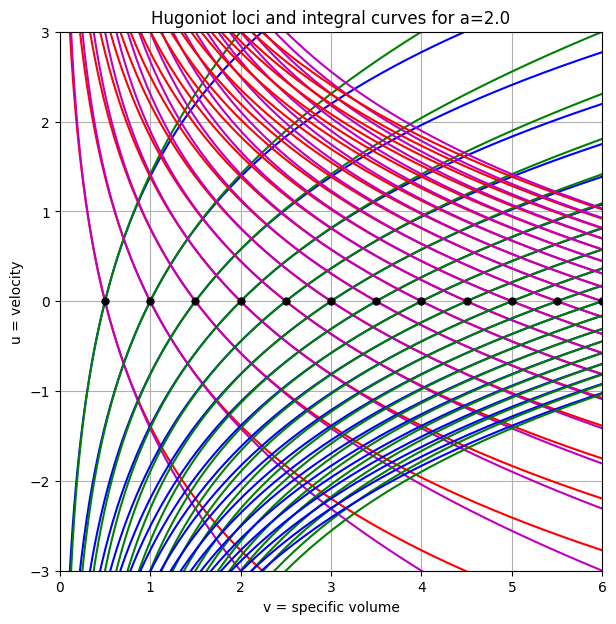

In [5]:
from IPython.display import Image
Image('isothermal1.png', width=500)

**Question 1.** 

Work out the flux Jacobian and its eigenvalues and eigenvectors.
Show that both characteristic families are genuinely nonlinear.

**Solution**

The Jacobian is $$\begin{bmatrix} 0 & -1 \\ -a^2/v^2 & 0 \end{bmatrix}.$$
Its eigenvalues are $$\lambda^1 = a/v, \quad \lambda^2 = -a/v.$$
Its eigenvectors are $$r^1 = \begin{bmatrix} v \\ a \end{bmatrix}, \quad r^2 = \begin{bmatrix} v \\ -a \end{bmatrix}.$$
The characteristic families are genuinely nonlinear because $$\lambda^1 \cdot r^1 = -a/v \neq 0$$ and $$\lambda^2 \cdot r^2 = a/v \neq 0$$

**Question 2.** 

Following Section 13.8.1, work out the equations for the integral
curves of the eigenvectors through an arbitrary point
$(v_*, u_*)$, e.g. specifying $u(v)$ as $v$ varies (with $u(v_*) = u_*$).
You may find it convenient to use this to define Python functions
`uint1(v,vstar,ustar,a)`, `uint2(v,vstar,ustar,a)`, so that you can easily plot these as
functions of $v$.

**Solution**

The integral curves are $$u = u_* + a\ln(\frac{v}{v_*})$$ and $$u = u_* - a\ln(\frac{v}{v_*}).$$

In [3]:
import numpy as np
def uint1(v,vstar,ustar,a):
    return ustar + a*np.log(v/vstar)
def uint2(v,vstar,ustar,a):
    return ustar - a*np.log(v/vstar)

**Question 3.** 

Determine similar equations for the Hugoniot loci through an
arbitrary point $(v_*, u_*)$, e.g. specifying $v(u)$ as $u$ varies
away from $u_*$.  You may find it convenient to use this to define Python functions
`uhug1(v,vstar,ustar)`, `uhug2(v,vstar,ustar)`, so that you can easily plot these as
functions of $v$.

Also give the formula for the shock speed $s(v)$
for any point $(v,u(v))$ along this curve and show that this can be written as

$$
s(v)= \pm \frac{a}{\sqrt{vv_*}}.
$$

(Note that, as expected, this converges
to the corresponding eigenvalue as $v \rightarrow v_*$.)

**Solution**

The Hugoniot loci are $$u = u_* \pm \frac{a\|v_* - v\|}{\sqrt{vv_*}}.$$
Defining $$\alpha = v - v_*,$$ the Hugoniot loci are $$u = u_* \pm \frac{a\alpha}{\sqrt{vv_*}}.$$
The shock speed is $$s(v) = \pm \frac{a}{\sqrt{vv_*}}.$$

In [18]:
def uhug1(v,vstar,ustar,a):
    alpha = v - vstar
    return ustar + a*alpha/np.sqrt(vstar*v)
def uhug2(v,vstar,ustar,a):
    alpha = v - vstar
    return ustar - a*alpha/np.sqrt(vstar*v)

**Question 4.** 

For the particular case $a=2$,
plot these curves to produce a plot similar to that shown above, and
indicate which curves correspond to which family and which are Hugoniot
loci or integral curves.  If you can't produce your own plot, at least
figure this out for the plot shown above, as best you can, and specify what
each color curve corresponds to.

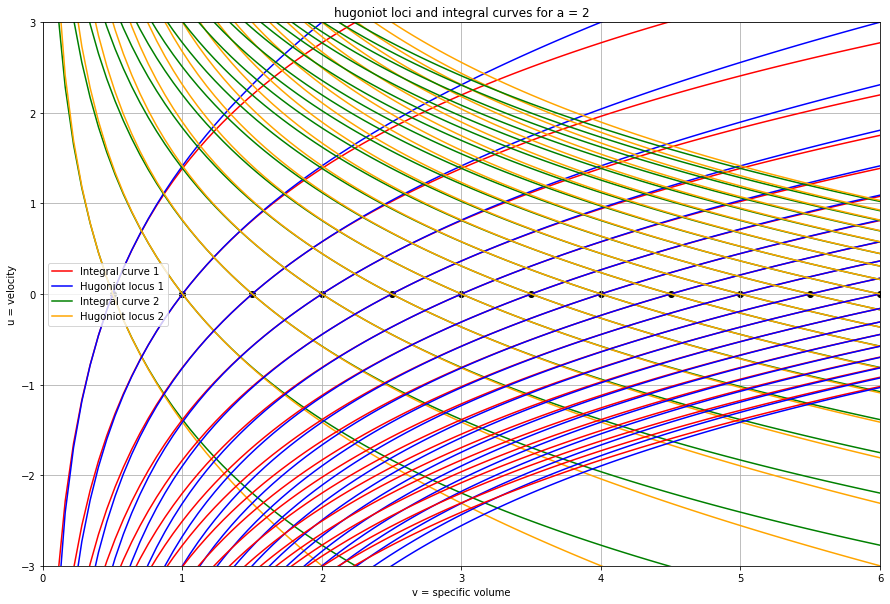

In [35]:
import matplotlib.pyplot as plt
a=2
v = np.linspace(0.1,6,100)
ustar = 0
vstar = 0.5
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(v, uint1(v,vstar,ustar,a), label='Integral curve 1', color = 'red')
plt.plot(v, uhug1(v,vstar,ustar,a), label='Hugoniot locus 1', color = 'blue')
plt.plot(v, uint2(v,vstar,ustar,a), label='Integral curve 2', color = 'green')
plt.plot(v, uhug2(v,vstar,ustar,a), label='Hugoniot locus 2', color = 'orange')
for vstar in np.linspace(1,10,19):
    plt.plot(v, uint1(v,vstar,ustar,a), color = 'red')
    plt.plot(v, uhug1(v,vstar,ustar,a), color = 'blue')
    plt.plot(v, uint2(v,vstar,ustar,a), color = 'green')
    plt.plot(v, uhug2(v,vstar,ustar,a), color = 'orange')
plt.scatter(np.linspace(0.5,10,20), ustar*np.ones(20), color = 'black')
plt.grid()
plt.xlim(0,6)
plt.ylim(-3,3)
plt.xlabel('v = specific volume')
plt.ylabel('u = velocity')
plt.title(f"hugoniot loci and integral curves for a = {a}")
plt.legend()
plt.show()

**Question 5.** 

Given the physical interpretation of this system (and remembering that $q=(v,u)$),
we expect that if
$q_\ell = (1,-2)$ and $q_r = (1,2)$, then the solution to the 
Riemann problem with this data should consist of two rarefaction waves.
For the case $a=2$, determine the middle state $q_m$ for this solution. 
You should be able to solve this analytically.

Confirm that this is the physically correct solution by considering how the relevant eigenvalue varies as you move from $q_\ell$ to $q_m$ to $q_r$.

*Note:* You do not need to find the form of the rarefaction waves
$\tilde q(x/t)$ for this homework.  But you will for the next homework, so
you might want to think about this too.


**Solution**

The middle state is $$v_m = e^{2/a}$$ and $$u_m = 0$$

**Question 6.** 

What is the two-shock Riemann solution for arbitrary $q_\ell$ and
$q_r$?  You should also be able to solve this analytically.  

*Hint:* solve a quadratic equation for $\sqrt{v_m}$.

As an example, what is the 2-shock solution for the data from the previous
part, $a=2, ~q_\ell = (1,-2)$ and $q_r = (1,2)$?

How far is this from the correct middle state from the 2-rarefaction solution?

**Solution**

The middle state specific volume is $$v_m = \left(\frac{(u_r - u_l)\sqrt{v_l v_r} + \sqrt{v_l v_r (u_r - u_l)^2 + 4a^2(v_l\sqrt{v_r} + v_r\sqrt{v_l})(\sqrt{v_r} + \sqrt{v_l})}}{2a(\sqrt{v_r} + \sqrt{v_l})}\right)^2$$ given that the fraction being squared is non-negative. 
The velocity is $$u_m = u_l + \frac{a(v_m - v_l)}{\sqrt{v_m v_l}}.$$
For the data from the previous part, the middle state is $$v_m = \frac{3+\sqrt{5}}{2}\approx 2.62$$ and $$u_m = 0.$$ This is pretty close to the correct middle state from the 2-rarefaction solution, where $$v_m = e^{2/a} = e \approx 2.72.$$

**Question 7.** 

Produce a phase plane plot that shows $q_\ell,~q_m,~q_r$, and the curves connecting them from the answer to Question 5, and also the Hugoniot loci from Question 6.


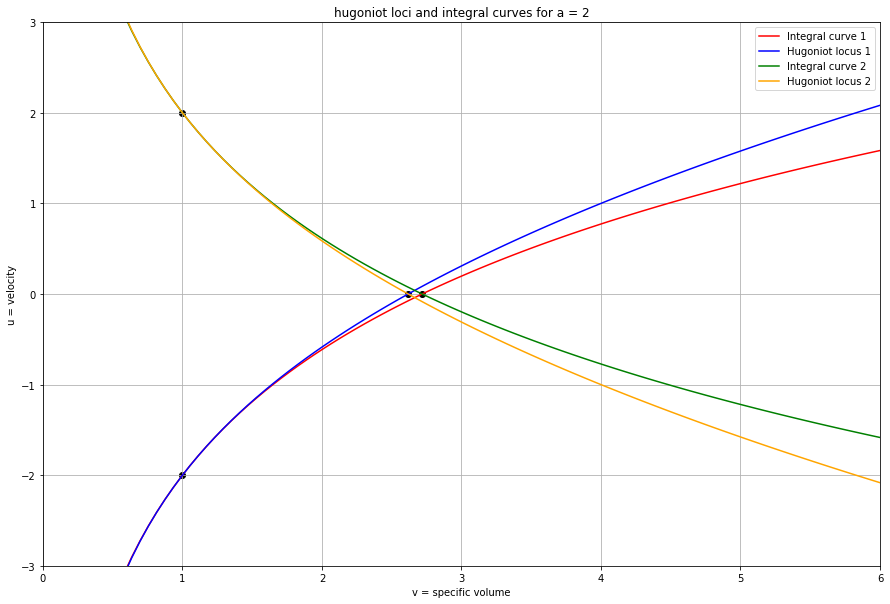

In [39]:
import matplotlib.pyplot as plt
a=2
v = np.linspace(0.1,6,100)
vstar = 1

ustar = -2
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(v, uint1(v,vstar,ustar,a), label='Integral curve 1', color = 'red')
plt.plot(v, uhug1(v,vstar,ustar,a), label='Hugoniot locus 1', color = 'blue')

ustar = 2
plt.plot(v, uint2(v,vstar,ustar,a), label='Integral curve 2', color = 'green')
plt.plot(v, uhug2(v,vstar,ustar,a), label='Hugoniot locus 2', color = 'orange')

plt.scatter([1,1, 2.62, 2.72], [-2,2,0,0], color = 'black')
plt.grid()
plt.xlim(0,6)
plt.ylim(-3,3)
plt.xlabel('v = specific volume')
plt.ylabel('u = velocity')
plt.title(f"hugoniot loci and integral curves for a = {a}")
plt.legend()
plt.show()